In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train=pd.read_csv('Logistic_X_Train.csv')
X_test=pd.read_csv('Logistic_X_Test.csv')
Y_train=pd.read_csv('Logistic_Y_Train.csv')

In [3]:
print(X_train.shape,Y_train.shape,X_test.shape)

(3000, 3) (3000, 1) (1000, 3)


In [4]:
X_train.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [5]:
np.mean(X_train,axis=0)

f1    0.007453
f2    0.999286
f3    0.029487
dtype: float64

In [6]:
np.std(X_train,axis=0)

f1    1.333915
f2    1.023682
f3    1.209356
dtype: float64

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [8]:
X_train.isnull().any()

f1    False
f2    False
f3    False
dtype: bool

In [9]:
df=X_train.join(Y_train)

In [10]:
df.head(n=10)

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0
5,0.656532,0.991440,0.870280,0
6,1.453978,0.583741,1.277378,0
7,1.124756,1.116124,1.442579,0
8,-1.723841,-0.175289,-0.588835,1
9,-0.794138,1.958963,-0.270497,1


In [11]:
X_train.corr()

,f1,f2,f3
f1,1.000000,0.553890,0.650504
f2,0.553890,1.000000,0.137088
f3,0.650504,0.137088,1.000000


In [12]:
X_train=X_train.values

In [13]:
Y_train=Y_train.values

In [14]:
X_train.shape
Y_train.shape

(3000, 1)

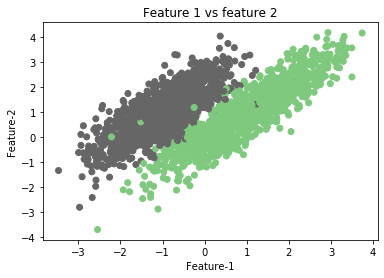

In [15]:
plt.scatter(X_train[:,0],X_train[:,1:2],cmap=plt.cm.Accent,c=Y_train)
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Feature 1 vs feature 2')
plt.show()

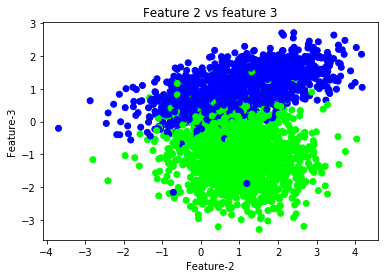

In [16]:
plt.scatter(X_train[:,1],X_train[:,2:],cmap=plt.cm.brg,c=Y_train)
plt.xlabel('Feature-2')
plt.ylabel('Feature-3')
plt.title('Feature 2 vs feature 3')
plt.show()

In [17]:
u=X_train.mean(axis=0)
std=X_train.std(axis=0)

In [18]:
X_train=(X_train-u)/std

In [19]:
X_test=X_test.values

In [20]:
X_test=(X_test-u)/std

In [21]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [22]:
val=np.linspace(-20,20,40)

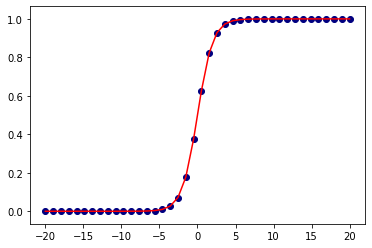

In [23]:
plt.scatter(val,sigmoid(val),color='navy')
plt.plot(val,sigmoid(val),color='red')
plt.show()

In [24]:
Y_train=Y_train.reshape((-1,))

In [25]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [26]:
def error(X,Y,theta):
    m,n=X.shape
    e=0.0
    hi=hypothesis(X,theta)
    e=np.sum(Y*(np.log(hi))+(1-Y)*(np.log(1-hi)))
    return -e/m

In [27]:
def gradient(X,Y,theta):
    m,n=X.shape
    grad=np.zeros((n,))
    hi=hypothesis(X,theta)
    grad=np.dot((X.T),(Y-hi))
    return grad/m

In [28]:
def gradientDescent(X,Y,learning_rate=3,max_iter=500,precision=0.00001):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    previous_error=0
    for i in range(max_iter):
        e=error(X,Y,theta)
        error_list.append(e)
        grad=gradient(X,Y,theta)
        
        theta=theta+learning_rate*grad
        if abs(previous_error-e)<precision:
            break
        previous_error=e
    return theta,error_list,len(error_list)

In [29]:
ones=np.ones((X_train.shape[0],1))
X_train=np.hstack((ones,X_train))

In [30]:
theta,error_list,l=gradientDescent(X_train,Y_train)

In [31]:
print(l)

210


In [32]:
print(theta)

[-1.15417088 -4.98687481  3.09625034 -2.93402568]


0.03365801359661031


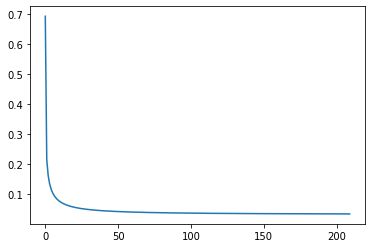

In [33]:
print(error_list[-1])
plt.plot(error_list)
plt.show()

In [34]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    output[h>=0.5]=1
    return output

In [35]:
out=predict(X_train,theta)

In [36]:
def Accuracy(actual,predictions):
    n_samples=actual.shape[0]
    correct_pred=(predictions==actual).sum()
    accuracy=(correct_pred/n_samples)*100
    return accuracy

In [37]:
acc=Accuracy(Y_train,out)
print(acc)

99.5


# Logistic Regression Using Sklearn

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log=LogisticRegression()

In [40]:
log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
log.coef_[0]

array([-6.43934797e-06, -4.99678127e+00,  3.04006980e+00, -2.72877543e+00])

In [42]:
log.intercept_[0]

-1.1823314281326536

# Making Predictions

In [43]:
X_test.shape

(1000, 3)

In [44]:
test_ones=np.ones((X_test.shape[0],1))
X_test=np.hstack((test_ones,X_test))

In [45]:
X_test

array([[ 1.        , -0.58096727, -1.23196981, -2.10386172],
       [ 1.        , -0.93642077,  0.43931113, -0.36596031],
       [ 1.        ,  1.43773502,  0.91090225,  1.08581064],
       ...,
       [ 1.        , -0.89542577, -0.05073748, -0.67463414],
       [ 1.        , -0.40465638,  0.8263143 , -0.84593545],
       [ 1.        ,  0.39940977, -0.40861529,  0.29533219]])

In [46]:
result=predict(X_test,theta)

In [47]:
result=result.astype('int')

In [48]:
submit=pd.DataFrame(result)

In [49]:
submit

,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [50]:
submit.to_csv('submission.csv',header=['label'],index=False)